# <ins> <p style="text-align:center;">**Healthcare Analysis for Stroke Prediction**</p><ins>


**<ins>Introduction:</ins>**

In healthcare, accurately predicting and managing stroke risk is vital. This project leverages machine learning techniques to analyze and predict stroke risk based on a variety of patient data. Through a comprehensive process of data cleaning, exploration, and visualization, we identify key factors that contribute to stroke risk. By applying various data analysis methods, the project aims to provide healthcare professionals with valuable insights for making informed decisions regarding patient care.

The dataset used in this project includes a range of health and demographic features, carefully curated to evaluate stroke risk and predict outcomes. Our approach encompasses all stages of data processing, from cleaning and exploration to visualization and modeling.

**<ins>Dataset:</ins>**   
* **ID:** A unique identifier for each individual.
* **Gender:** The gender of the individual (e.g., male or female).
* **Age:** The age of the individual.
* **Hypertension:** A binary indicator of whether the individual has hypertension (high blood pressure).
* **Heart Disease:** A binary indicator of whether the individual has heart disease.
* **Ever Married:** A binary indicator of marital status (whether the individual has ever been married).
* **Work Type:** The type of work the individual engages in (e.g., private, government, self-employed).
* **Residence Type:** The type of area where the individual resides (urban or rural).
* **Average Glucose Level:** The average blood glucose level of the individual, an important marker for diabetes and overall health.
* **BMI:** The Body Mass Index, a measure of body fat based on height and weight.
* **Smoking Status:** The smoking behavior of the individual (e.g., never smoked, formerly smoked, currently smoking).
* **Stroke:** A binary indicator of whether the individual has experienced a stroke.

## **(1). Defining Problem Statement and Analyzing Basic Metrics**
***

The primary goal of this project is to develop a model that classifies patient data to predict the likelihood of a stroke. By analyzing various health and demographic factors, we aim to identify key predictors of stroke, providing healthcare professionals with insights that support early intervention and preventive care. 

To achieve this, we leverage powerful data manipulation and analysis tools, utilizing libraries like NumPy and Pandas for data processing, and Matplotlib and Seaborn for data visualization. Additionally, machine learning algorithms, such as Logistic Regression, are employed to build the predictive model, with evaluation metrics like accuracy, precision, recall, and F1 score used to assess performance.

## **(2). Import libraries and Load the dataset**
***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, root_mean_squared_error, confusion_matrix

# To ignore the warnings & make the code more presentable
import warnings
warnings.filterwarnings("ignore")  # This will suppress warnings in the output


In [864]:
# Load stroke_dataset.csv dataset into a pandas dataFrame
df = pd.read_csv("stroke_dataset.csv")

In [865]:
# shows the top 5 records of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [866]:
# NOTE: If the original dataset did not have any headers/column-name, then we can update the respective column-name for the dataset as below:

# df.columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
# df.columns

## **(3) Data Exploration and Pre-processing**
***

### **Check basic metrics and data types**

Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in **data exploration.**

In [867]:
# Checking the number of rows and columns in our Dataset
df.shape

(5110, 12)

#### **Observations:**

- **Row**: We have **5110 Rows**.
- **Columns**: We have **12 columns**.

In [868]:
# Getting a summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### **Observations:**

- **Entries**: The DataFrame contains **5110 entries**.
- **Columns**: There are **12 columns**, representing various patient attributes.

Data Types

- **Integer (`int64`)**: 4 columns (e.g., `hypertension`, `stroke`).
- **Float (`float64`)**: 3 columns (e.g., `age`, `avg_glucose_level`).
- **Object**: 5 columns (e.g., `gender`, `work_type`).

Memory Usage

- The DataFrame uses approximately **479.2 KB** of memory.


In [869]:
# Describing the statistical summary of numerical type data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Observations:**

- **Count**: Most features have **5110 entries**, except `bmi`, which has **4909** due to missing values.
  
- **Age**:
  - **Mean**: Approximately **43.2 years**.
  - **Range**: From **25 to 82 years**.

- **Hypertension**:
  - **Mean**: About **9.7%** of patients have hypertension.
  - **Maximum**: Up to **1** (indicating presence of hypertension).

- **Heart Disease**:
  - **Mean**: Roughly **5.4%** of patients have heart disease.

- **Average Glucose Level**:
  - **Mean**: Approximately **106.1 mg/dL**.
  - **Range**: From **55.1 to 271.7 mg/dL**.

- **BMI**:
  - **Mean**: Around **28.9**.
  - **Range**: From **10.3 to 97.6**.

- **Stroke**:
  - **Mean**: About **4.9%** of patients have experienced a stroke.
  - **Maximum**: Up to **1** (indicating stroke occurrence).

**Insights**
- The relatively low percentage of stroke occurrences (4.9%) suggests that while risk factors are present, many patients do not experience strokes. This highlights the potential for preventive interventions targeting identified risk factors.


### **Statistical Summary of categorical type data**

In [870]:
# Statistical summary of categorical type data
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### **Observations**

- **Count**: All categorical features have **5110 entries**, indicating a complete dataset for these columns.

- **Unique Values**:
  - **Gender**: 3 unique values (e.g., Male, Female, Other).
  - **Ever Married**: 2 unique values (Yes, No).
  - **Work Type**: 5 unique values (e.g., Private, Government, Self-employed, etc.).
  - **Residence Type**: 2 unique values (Urban, Rural).
  - **Smoking Status**: 4 unique values (e.g., Never smoked, Formerly smoked, Currently smoking).

- **Most Frequent Values**:
  - **Gender**: The most common category is **Female** with **2994** occurrences.
  - **Ever Married**: **Yes** is the most frequent response, with **3353** occurrences.
  - **Work Type**: The **Private** sector is the most common, appearing **2925** times.
  - **Residence Type**: **Urban** areas are more common, with **2596** occurrences.
  - **Smoking Status**: The most common status is **never smoked**, with **1892** occurrences.
  
**Insights**
- The predominance of females and married individuals suggests a potential demographic focus for healthcare interventions. Additionally, the high frequency of private work and urban residence may reflect socioeconomic factors influencing health outcomes.



### **Check for missing values**

Identifying and handling missing values is considered **data cleaning** since it involves addressing the issue of incomplete data. Depending on the extent of missing data, we need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a **data preprocessing** step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [871]:
# Display the count of missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [872]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_values_percentage)

Missing Values Percentage:

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


### **Observations**

- **Missing Values Percentage**:
  - All columns, except for **`bmi`**, have a missing values percentage of **0.00%**.
  - The **`bmi`** column has a missing values percentage of **3.93%**, indicating that **201 out of 5110 entries** are missing.

**Insights**
- The **3.93%** missing data in the **`bmi`** column is relatively low but still significant enough to warrant consideration. Handling these missing values through methods such as imputation is essential to ensure the integrity of analyses and predictive modeling.

### **Handling null values**

In [873]:
# Impute missing values in 'bmi' with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

### Rationale for Using Median Imputation for `bmi`

In this project, we are imputing the missing values in the `bmi` column with the **median** for several key reasons:

1. **Less Affected by Outliers:** The median is not influenced by extreme values, giving a more accurate picture of bmi, especially in health data where outliers can distort results.

2. **Works Better for Skewed Data:** The median is a better choice when data isn’t evenly spread out, helping the imputed values better reflect the population.

3. **Keeps More Data:** By using the median, we avoid losing too much data, ensuring we have enough to train the model.

4. **Simple and Fast:** It’s easy to use and doesn’t take much time or computing power.

Using the median helps make our stroke risk predictions more reliable


## **(4) Data Analysis**

Data analysis focuses on identifying key factors that contribute to stroke occurrences in patients by examining a comprehensive dataset. Variables such as age, gender, body mass index (BMI), smoking status, and medical history will be analyzed to uncover patterns and correlations.

Utilizing data visualization techniques, this study aims to communicate findings effectively, informing healthcare providers about stroke risk factors

### A. Distribution of Stroke Occurrences

#### Q: What is the distribution of stroke occurrences in the dataset? Are strokes common or rare among the patient population?

Let's Start by visualizing the target variable to understand the balance of stroke occurrences.

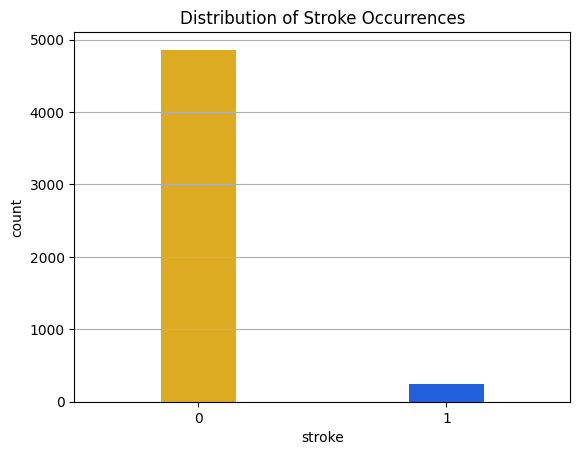

In [874]:
# Plotting countplot to understand the balance of stroke occurrences.
sns.countplot(data=df, x='stroke', width=0.3, palette=['#fcba03', '#0356fc'])
plt.title('Distribution of Stroke Occurrences')
plt.grid(axis='y')
plt.show()


### **Observations for Distribution of Stroke Occurrences Countplot**

The data shows an imbalance, with around 80% of cases being non-stroke and only 20% being stroke cases. This imbalance means that stroke cases are less common in the dataset, which is important to keep in mind as we analyze and interpret the data

### B. Average Glucose Level and Stroke

#### Q: Is there a difference in average glucose levels between patients who had a stroke and those who did not?

A KDE plot can help illustrate the distribution of avg glucose level for patients with and without strokes.

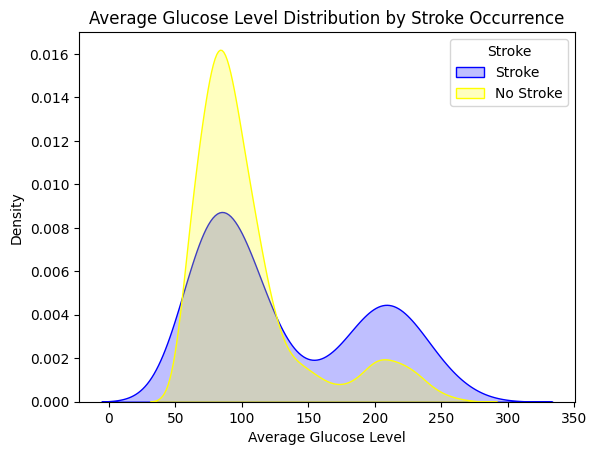

In [875]:
# KDE (Kernel Density Estimation) plot for stroke and non-stroke cases
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', fill=True, label='Stroke', color='blue')
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', fill=True, label='No Stroke', color='yellow')

# Adding labels and title
plt.title('Average Glucose Level Distribution by Stroke Occurrence')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')

# Show legend
plt.legend(title='Stroke', loc='upper right')

# Display the plot
plt.show()


### **Observation for Average Glucose Level and Stroke Boxplot**

- The yellow curve (non-stroke cases) shows a peak in average glucose levels around 100, indicating most individuals without strokes have normal glucose levels.
- The blue curve (stroke cases) exhibits a broader spread, with a notable peak around 200, suggesting higher glucose levels are more common among individuals who experienced a stroke.

This indicates a possible correlation between elevated glucose levels and stroke occurrence, emphasizing its importance as a predictive feature


### C. BMI Distribution by Stroke Occurrence

#### Q: Does BMI differ between stroke and non-stroke patients? Could BMI be a factor related to stroke risk?

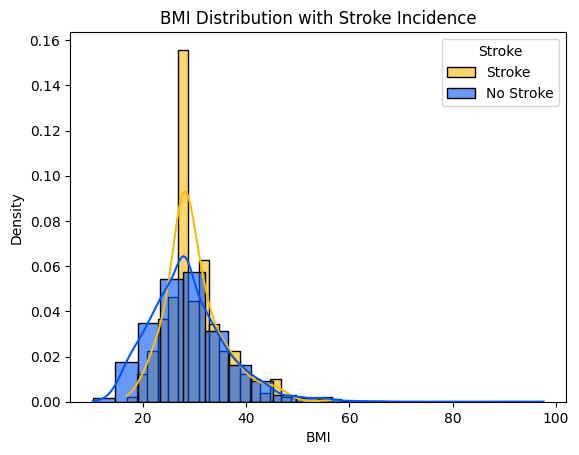

In [876]:
# Histogram with KDE (Kernel Density Estimation) for stroke cases (BMI distribution)
sns.histplot(data=df[df['stroke'] == 1], x='bmi', kde=True, color='#fcba03', label='Stroke', stat='density', bins=20, alpha=0.6) # histogram will have 20 intervals

# Histogram with KDE (Kernel Density Estimation) for non-stroke cases (BMI distribution)
sns.histplot(data=df[df['stroke'] == 0], x='bmi', kde=True, color='#0356fc', label='No Stroke', stat='density', bins=20, alpha=0.6) # histogram bars will have 60% opacity

# Adding labels and title
plt.title('BMI Distribution with Stroke Incidence')
plt.xlabel('BMI')
plt.ylabel('Density')

# Show legend
plt.legend(title='Stroke', loc='upper right')

# Display the plot
plt.show()

### **Observations for BMI Distribution by Stroke Occurrence**

- The blue curve (no stroke) shows that the majority of individuals without a stroke have a BMI clustered between 20 and 30, reflecting a more typical BMI range.
- The yellow curve (stroke cases) has a similar central range but shows a slightly broader distribution, suggesting that individuals with strokes may have BMIs extending into higher ranges.

This indicates that BMI alone is not a strong differentiator for stroke occurrence but may still play a contributing role when combined with other factors like glucose levels and age.


### D. Smoking Status and Stroke

#### Q: Is there a link between smoking status and the occurrence of stroke?

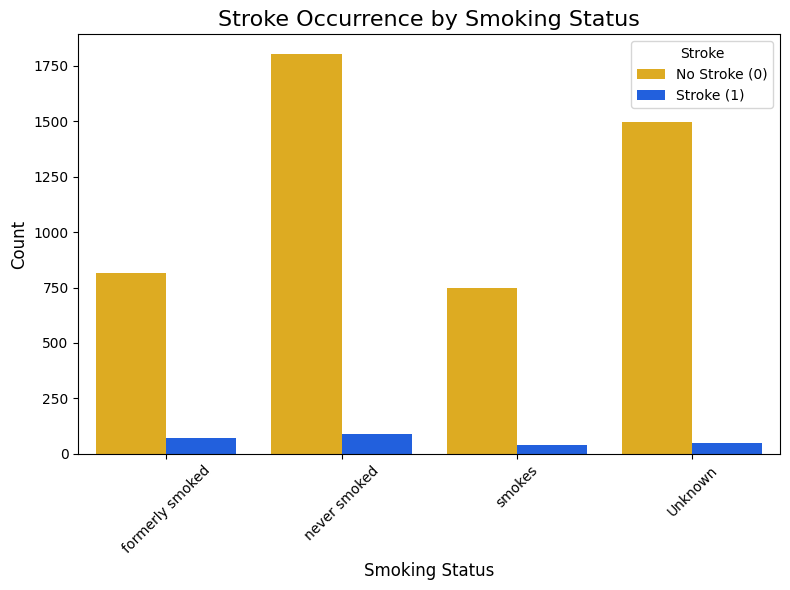

In [877]:
# Smoking Status and Stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette=['#fcba03', '#0356fc'])  

plt.title('Stroke Occurrence by Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Stroke', loc='upper right', labels=['No Stroke (0)', 'Stroke (1)'])

plt.tight_layout()
plt.show()


### **Observation for Smoking Status and Stroke Countplot**

**Formerly Smoked**
- Approximately 800 non-stroke cases and around 50 stroke cases are reported, indicating a relatively lower stroke risk compared to never smokers.

**Never Smoked**
- This group has the highest count of non-stroke cases (about 1800) and around 100 stroke cases, suggesting a protective effect against stroke.

**Currently Smoking**
- Non-stroke cases among current smokers are slightly lower than those who formerly smoked, with stroke counts also lower than both formerly smoked and never smoked categories. This implies that smoking may not strongly correlate with stroke incidence.

**Unknown Smoking Status**
- About 1500 individuals are classified as unknown smoking status, with a higher incidence of stroke compared to non-smokers, suggesting significant risk factors may be associated with this category.

The plot suggests that individuals who never smoked have the lowest stroke incidence, followed by former smokers. The unknown smoking status group shows a higher incidence of stroke, possibly indicating underlying or unmeasured risk factors.


### E. Work Type and Stroke

#### Q: Does the type of work an individual engages in correlate with stroke occurrence?

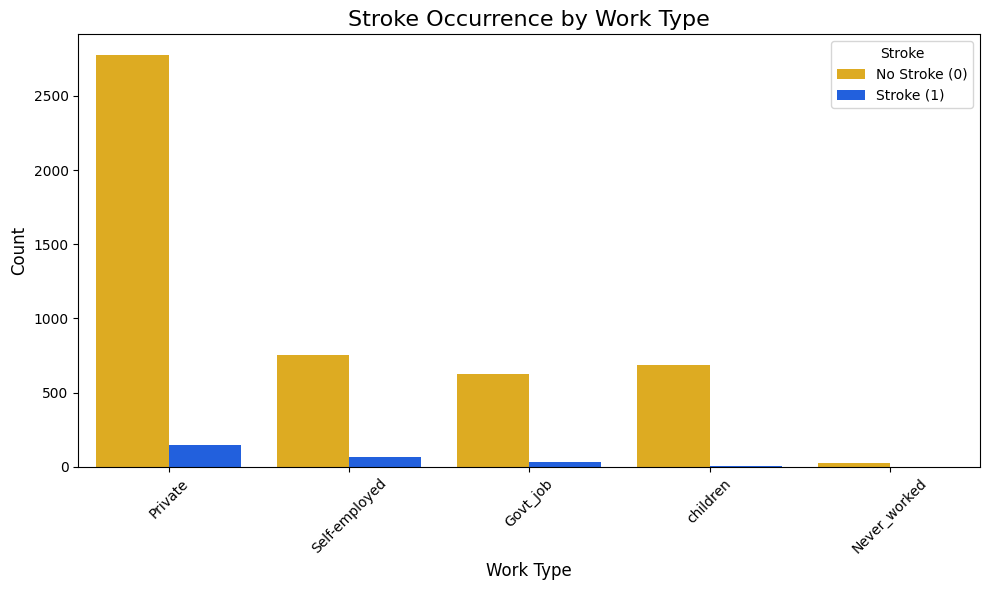

In [878]:
# Work Type and Stroke
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke', palette=['#fcba03', '#0356fc']) 

plt.title('Stroke Occurrence by Work Type', fontsize=16)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Stroke', loc='upper right', labels=['No Stroke (0)', 'Stroke (1)'])

plt.tight_layout()
plt.show()

### **Observation for Work Type and Stroke Countplot** 

**Never Worked**
- No stroke cases are reported, indicating this group is not at risk for stroke in the dataset.

**Children**
- Stroke cases among children are low, suggesting that strokes are rare in this age group.

**Government Jobs**
- Stroke cases are present but low; the non-stroke count is slightly higher, indicating more government employees do not experience strokes.

**Self-Employed**
- This category shows a slightly higher incidence of strokes compared to government jobs, but the non-stroke count remains significantly higher, indicating some risk but not extensive.

**Private Sector**
- The private sector has the highest stroke count at approximately 150, with non-stroke cases exceeding 2500, suggesting higher risks for stroke compared to other work types.

The analysis shows that while strokes occur across different work types, the private sector has the highest incidence. In contrast, government jobs and individuals who never worked exhibit lower stroke counts. The absence of stroke cases in the "never worked" category suggests that employment type may influence stroke risk, warranting further investigation into factors contributing to higher stroke rates in the private sector.


### F. Pairplot (All Variables with Stroke Occurrence)

#### Q: How do all relevant variables interact with each other and with stroke occurrence?

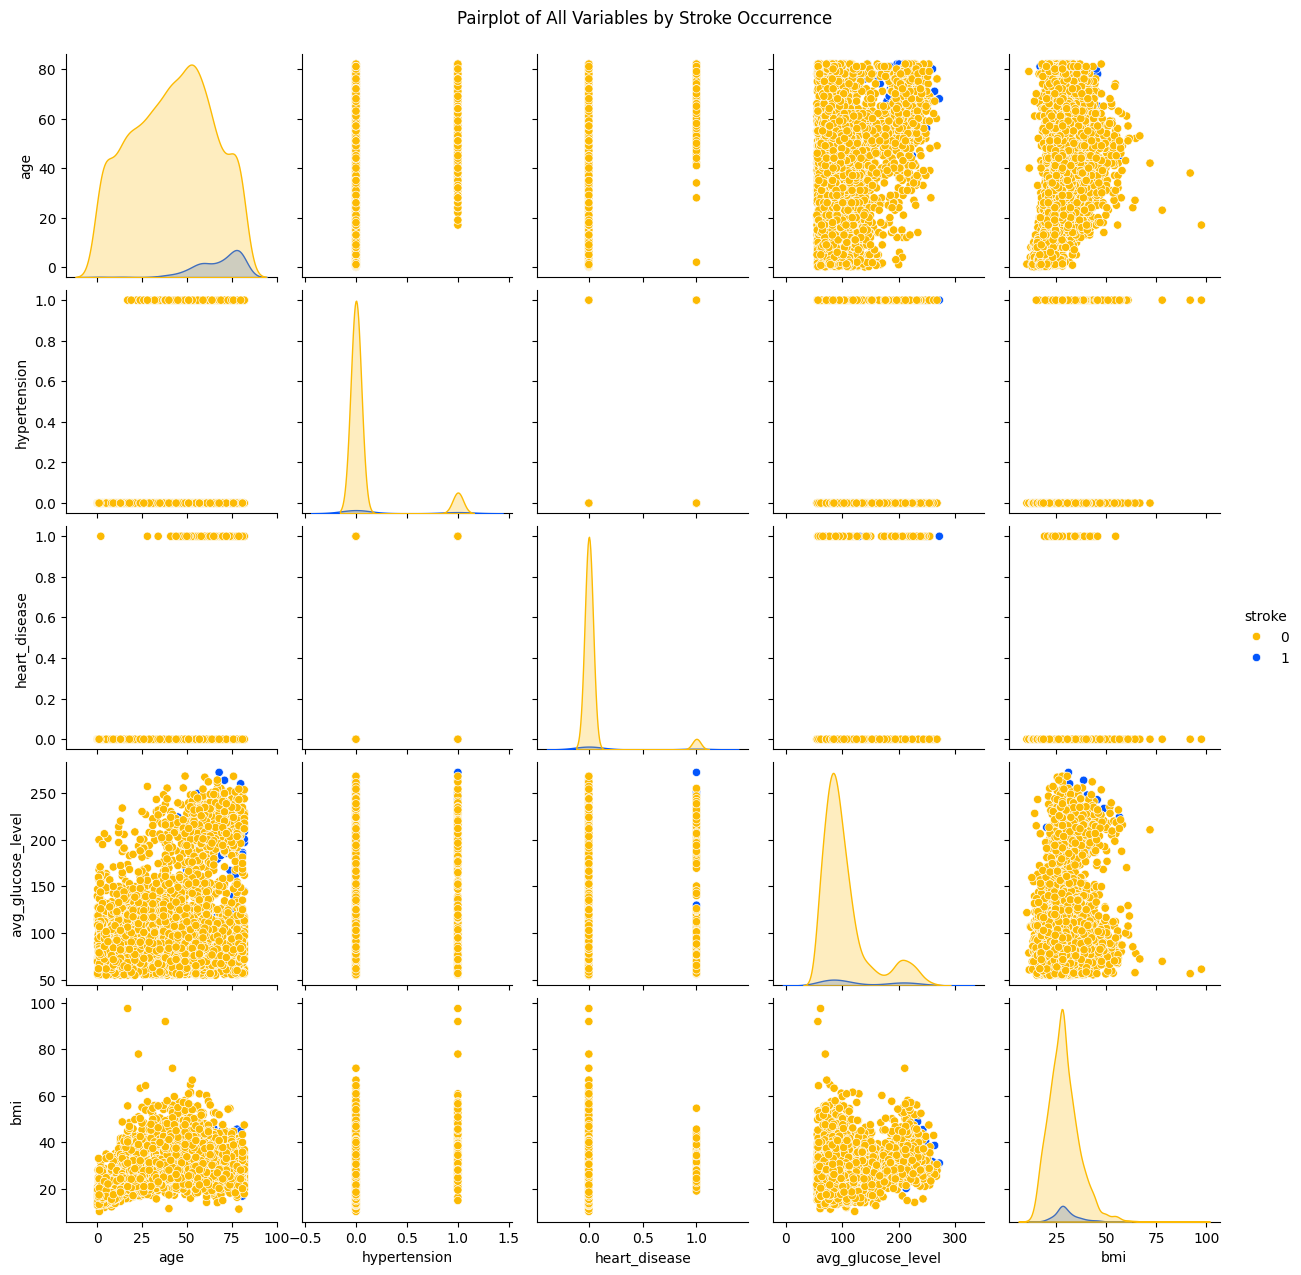

In [879]:
# Drop the 'id' column
df_clean = df.drop(columns=['id'])

# Create the pairplot
sns.pairplot(df_clean, hue='stroke', palette={0: '#fcba03', 1: '#0356fc'})

plt.suptitle('Pairplot of All Variables by Stroke Occurrence', y=1.02)
plt.show()

### Observations for Pairplot

The pairplot suggests that age, hypertension, heart disease, and average glucose level are influential factors associated with stroke. The data indicates that stroke is more likely to occur in:
- Older individuals
- Those with hypertension
- Those with heart disease
- Those with higher average glucose levels
BMI shows a weaker association but still contains some outliers among stroke cases. 

This pairplot visualization helps to identify these key relationships, highlighting potential areas for further analysis and risk factor prioritization in stroke prevention efforts.

## **(5) Data Encoding**

Convert categorical variables (e.g., gender, ever_married, work_type, Residence_type, smoking_status) into numerical formats. we can use techniques such as:

  - Label Encoding: For ordinal variables (if any, though none are specified here)
  - One-Hot Encoding: For nominal variables (e.g., gender, work_type).

In [880]:
# Encoding gender
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Encoding ever_married
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding Residence_type
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


### Observations on Data Encoding

- **Gender Encoding**: The `gender` column is now binary, with `1` for "Male" and `0` for others.
- **Ever Married Encoding**: The `ever_married` column is encoded as `1` for "Yes" and `0` for "No".
- **Residence Type Encoding**: The `Residence_type` column is transformed into `1` for urban and `0` for rural.

These binary encodings simplify categorical variables, making them ready for machine learning models.

In [881]:
# Perform One-Hot Encoding for 'work_type' and 'smoking_status'
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=False)

# List of the columns we want to transform
columns_to_transform = [
    'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
    'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown',
    'smoking_status_formerly smoked', 'smoking_status_never smoked',
    'smoking_status_smokes' 
]

# Apply the transformation (True/False to 1/0) only on the specified columns
df[columns_to_transform] = df[columns_to_transform].astype(int)

df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


### Observations on One-Hot Encoding

- **One-Hot Encoding for `work_type`**:  
  The `work_type` column has been expanded into multiple binary columns, including:  
  - `work_type_Govt_job`, `work_type_Never_worked`, `work_type_Private`, `work_type_Self-employed`, and `work_type_children`.

- **One-Hot Encoding for `smoking_status`**:  
  The `smoking_status` column has been expanded into multiple binary columns, such as:  
  - `smoking_status_Unknown`, `smoking_status_formerly smoked`, `smoking_status_never smoked`, and `smoking_status_smokes`.

- **Binary Transformation**:  
  The values in these newly created columns are transformed into `1` (True) or `0` (False) using the `.applymap()` function. This ensures each category is represented numerically.
 
One-hot encoding was applied to both `work_type` and `smoking_status`, creating multiple binary columns. This transformation allows the model to process these categorical features as numeric values, aiding in stroke risk prediction.


## **(6) Model Creation**

#### Model Comparison: Linear, Lasso, Ridge, and Logistic Regression

In this analysis, we compare the performance of four machine learning models: **Linear Regression**, **Lasso Regression**, **Ridge Regression**, and **Logistic Regression**. We evaluate them based on two key metrics:
- **Accuracy** (for classification models)
- **Root Mean Squared Error (RMSE)** (for regression models)

In [882]:
# Separate the independent variables (X) and the target variable (y)
X = df.drop(columns=['id', 'stroke']) # independent variables
y = df['stroke']  # Target variable

We perform 80:20 Split Method using sklearn

One common data splitting method is the **80:20 split**, where:

- **80%** of the data is used for **training** the model.
- **20%** of the data is used for **testing** the model.

This split ensures that the model has enough data to learn from while still having a significant portion reserved for evaluation. By using a portion of the data for testing, we can assess how well the model generalizes to new, unseen data.


In [883]:
# Split the data into training and testing sets (80% training, 20% testing)
# random_state ensures reproducibility of the split, so you get the same train/test split each time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear Regression

Linear Regression is used to predict a continuous value. However, for a classification task like stroke prediction, it may not be the most suitable as it does not output probabilities.

Formula:

![Alt text](https://vtupulse.com/wp-content/uploads/2021/07/image-30.png "Linear Regression formula")




Where:
- **y**  is the predicted value (e.g., stroke probability),
- **Xi** are the input features (independent variables),
- **b_0** is the intercept (constant term),
- **b_1** are the coefficients for each feature.

This formula describes how the predicted value \( y \) is a linear combination of the input features, weighted by their corresponding coefficients.

In [884]:
# Initialize the Linear Regression model
lin_reg_model = LinearRegression()

In [885]:
# training our Linear Regression Model with our test data
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [886]:
# Predict on the test set
y_pred_lin_reg = lin_reg_model.predict(X_test)

In [887]:
# Calculate RMSE for Linear Regression
rmse_lin_reg = np.sqrt(root_mean_squared_error(y_test, y_pred_lin_reg))
print("Linear Regression RMSE:", rmse_lin_reg)

Linear Regression RMSE: 0.47648445260090544


### Observation:
The Linear Regression model has an RMSE of 0.476, indicating relatively high error in predictions. This suggests that the model's accuracy is low and it may not be the best at predicting stroke occurrences.

### 2. Lasso Regression

Lasso is a form of linear regression that includes a penalty term on the absolute values of the coefficients. This helps in both preventing overfitting and performing feature selection by driving some coefficients to zero.

Formula: 

![image.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Pbf-P0FjRg3VJdIhSuqeUg.png "Lasso Regression formula")

Where:

- The left side of the equation expresses the classical regression calculation.,
- Alpha is the regularization parameter (also called the penalty term),
- |Beta_i| are the coefficients of the model.



In [888]:
# Initialize the Lasso Regression model (with alpha=1.0 as an example, you can tune this hyperparameter)
lasso_model = Lasso(alpha=1.0)

In [889]:
# training our Lasso Regression Model with our test data
lasso_model.fit(X_train, y_train)

Lasso()

In [890]:
# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

In [891]:
# Calculate RMSE for Lasso Regression
rmse_lasso = np.sqrt(root_mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", rmse_lasso)

Lasso Regression RMSE: 0.48740037810550363


### Observation:
The Lasso Regression model has an RMSE of 0.487, indicating relatively high error in predictions. This suggests that the model's accuracy is low and it may not be the best at predicting stroke occurrences.

### 3. Ridge Regression

Ridge Regression is another variant of linear regression that adds a penalty to the loss function based on the squared values of the coefficients. This regularization technique helps prevent overfitting by shrinking the coefficients, making the model simpler and more robust.

Formula:

![Alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*7WR8ORB7cHNOJYZRBU5a1Q.png "Ridge Regression formula")



Where:

The left side of the equation represents the standard regression loss calculation. On the right, each beta coefficient is squared, and the squared values are summed up. This sum is then scaled by the regularization parameter **λ**, which acts as a tuning factor. This additional term serves as a regularization function, helping to adjust and balance the model

In [892]:
# Initialize the Ridge Regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

In [893]:
# training our Ridge Regression model Model with our test data
ridge_model.fit(X_train, y_train)

Ridge()

In [894]:
# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

In [895]:

# Calculate RMSE for Ridge Regression
rmse_ridge = np.sqrt(root_mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", rmse_ridge)

Ridge Regression RMSE: 0.4764857016643991


### Observation:
The Ridge Regression model has an RMSE of 0.476, indicating relatively high error in predictions. This suggests that the model's accuracy is low and it may not be the best at predicting stroke occurrences.


### 4. Logistic Regression

This algorithm models the probability of a binary outcome based on a set of input features. The output is transformed into a probability between 0 and 1 using the logistic function (sigmoid).

Formula:

![Alt text](http://faculty.cas.usf.edu/mbrannick/regression/gifs/lo4.gif "logistic function formula")


Where:
- **P** is the probability that the output is 1 (e.g., the probability of a stroke),
- **a + bx** is the linear combination of the input features (similar to linear regression),
- **e** is the base of the natural logarithm (approximately 2.718),
- The expression **1 / (1 + e^-x)**  is the **logistic function** (also known as the **sigmoid function**), which maps the linear combination of features to a probability between 0 and 1.

**Sigmoid Function**: The logistic function, also called the **sigmoid function**, is defined as:

- The sigmoid function takes any real-valued input (from the linear combination of features) and maps it to a value between 0 and 1, which can be interpreted as a probability.
- If the probability is greater than or equal to 0.5, the predicted class is 1 (positive class, e.g., stroke); otherwise, the predicted class is 0 (negative class, e.g., no stroke).


In [ ]:
class LogisticRegression:
    # Initialize learning rate and number of iterations
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None # Initialize weights or slopes
        self.bias = None  # Initialize bias or intercept

    # Sigmoid function to map predictions to probabilities between 0 and 1
    def sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))

    # Applying the logistic regression model to the training data
    def fit(self, X, y): 
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)  # Initialize weights to zero
        self.bias = 0  # Initialize bias to zero

        for _ in range(self.n_iters):
            
            # Calculating model output (linear combination of inputs and weights)
            model = np.dot(X, self.weights) + self.bias
            
            # Apply sigmoid to get predicted probabilities
            y_pred = self.sigmoid(model)

            # Calculating gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) # Gradient w.r.t. weights
            
            db = (1 / num_samples) * np.sum(y_pred - y)  # Gradient w.r.t. bias

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Compute the linear combination (z = X * weights + bias)
        linear_model = np.dot(X, self.weights) + self.bias
        
        y_pred = self.sigmoid(linear_model)
        
        # Return binary predictions (1 if y_pred >= 0.5, else 0)
        return (y_pred >= 0.5).astype(int)


In [897]:
# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()

In [898]:
# training our logistic regression Model with our test data
log_reg_model.fit(X_train, y_train)  

In [899]:
# Predict and evaluate the logistic regression model
y_pred_log_reg = log_reg_model.predict(X_test)

In [900]:
# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred_log_reg)

In [901]:
# Print the Accuracy results for Logistic Regression
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9393346379647749


### Observations:

- **Logistic Regression** has the highest **Accuracy** among all models, achieving an accuracy of **93.93%**. This makes it the best-performing model in this comparison. 

- This high accuracy indicates that **Logistic Regression** is highly effective at correctly predicting the target variable and is well-suited for the binary classification task of stroke prediction.

- In contrast, the other models (Linear, Lasso, and Ridge Regression) focus on minimizing continuous prediction errors and are evaluated using **RMSE**. These models are not optimized for classification tasks, which explains their comparatively weaker performance for this problem.

### Accuracy Scores

In [902]:
lin_reg_score = lin_reg_model.score(X_test, y_test) * 100
lasso_score = lasso_model.score(X_test, y_test) * 100
ridge_score = ridge_model.score(X_test, y_test) * 100
log_reg_score = accuracy_score(y_test, y_pred_log_reg) * 100

# Print the scores
print(f"Linear Regression Score: {lin_reg_score:.2f}%")
print(f"Lasso Regression Score: {lasso_score:.2f}%")
print(f"Ridge Regression Score: {ridge_score:.2f}%")
print(f"Logistic Regression Score: {log_reg_score:.2f}%")

Linear Regression Score: 9.54%
Lasso Regression Score: 0.97%
Ridge Regression Score: 9.54%
Logistic Regression Score: 93.93%


### Comparing Accuracy of All Models using Bar Plot

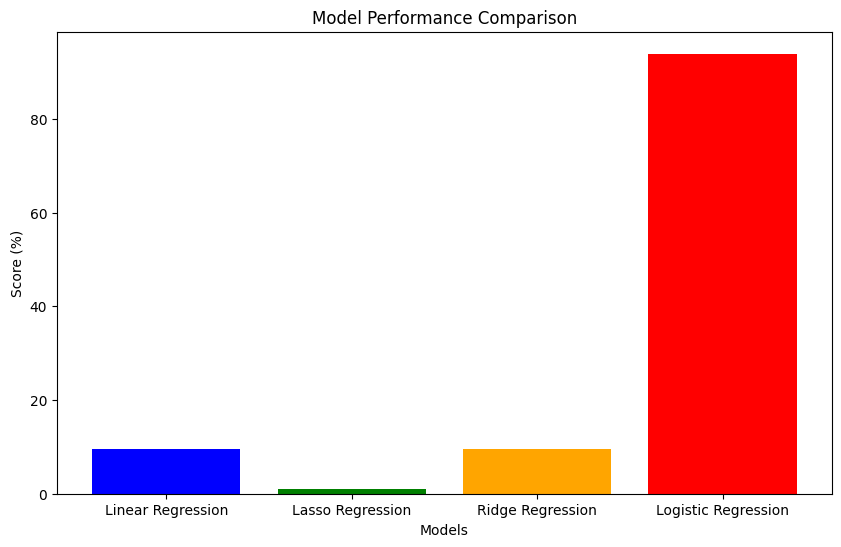

In [903]:
# Plot the scores in a bar chart
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression']
scores = [lin_reg_score, lasso_score, ridge_score, log_reg_score]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'orange', 'red'])

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score (%)')

# Show the plot
plt.show()

### Observations:

- **Logistic Regression** outperforms all other models significantly, achieving the highest performance score above 90%.
- Linear Regression, Ridge Regression, and Lasso Regression have relatively low and comparable scores, indicating their unsuitability for this classification task.



## **(7) Model Evaluation**

In the case of our Logistic Regression model, we will use the confusion matrix to assess its performance in predicting strokes, as it is currently providing the best results for our dataset.

### **Confusion Matrix:**

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted class labels with the actual ones. It provides insights into how well the model is performing by breaking down the predictions into four key categories:

- **True Positive (TP):** The number of instances where the model correctly predicted the positive class.
- **False Positive (FP):** The number of instances where the model incorrectly predicted the positive class (actual class is negative).
- **True Negative (TN):** The number of instances where the model correctly predicted the negative class.
- **False Negative (FN):** The number of instances where the model incorrectly predicted the negative class (actual class is positive).

![image.png](https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png)




In [904]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Extracting TP, FP, TN, FN from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

# Print the values of TP, FP, TN, FN
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 1
False Positives (FP): 1
True Negatives (TN): 959
False Negatives (FN): 61


Now we can Calculate metrics:
##### **1. Precision:** Measures how many of the predicted strokes (positive cases) are actually correct.

  Formula: 
  
  {Precision} = {TP}/{TP + FP}

  Where:  
  - **TP** (True Positive): The number of correctly predicted positive cases (strokes).
  - **FP** (False Positive): The number of incorrectly predicted positive cases (non-strokes predicted as strokes).


In [905]:
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f"Precision: {precision:.4f}")

Precision: 0.5000


### Observations

The precision value of 0.5000 indicates that none of the predicted strokes (positive cases) were correct. This suggests that the model is failing to correctly identify positive cases, and all predicted strokes might actually be false positives. The model may need improvement in detecting true positive cases.

##### **2. Recall:** Measures How many of the actual strokes were correctly identified by the model.

  Formula: 

Recall = True Positives (TP)/True Positives (TP) + False Negatives (FN)

Where:  
  - **TP** (True Positive): The number of correctly predicted positive cases (strokes).
  - **FN** (False Negative): The number of actual positive cases (strokes) that were incorrectly predicted as negative.


In [906]:
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f"Recall: {recall:.4f}")

Recall: 0.0161


### Observations

A recall value of 0.0161 indicates that the model is failing to correctly identify any of the actual strokes (positive cases). This suggests that the model is missing all of the true positive instances and is likely predicting them as negative cases. The model's performance needs significant improvement in detecting and correctly identifying positive cases (strokes)

##### **3. F1 Score:** A balance between Precision and Recall. It's useful when we want a single score to summarize the model's performance.

Formula:

F1 Score= 2 * (Precision + Recall / Precision * Recall)

In [907]:
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"F1 Score: {f1:.4f}")

F1 Score: 0.0312


### Observations

An F1 score of 0.0312 indicates poor performance, with the model failing to identify any positive cases (strokes). 

#### Ploting Confusion Matrix Heatmap

Confusion Matrix:
 [[959   1]
 [ 61   1]]


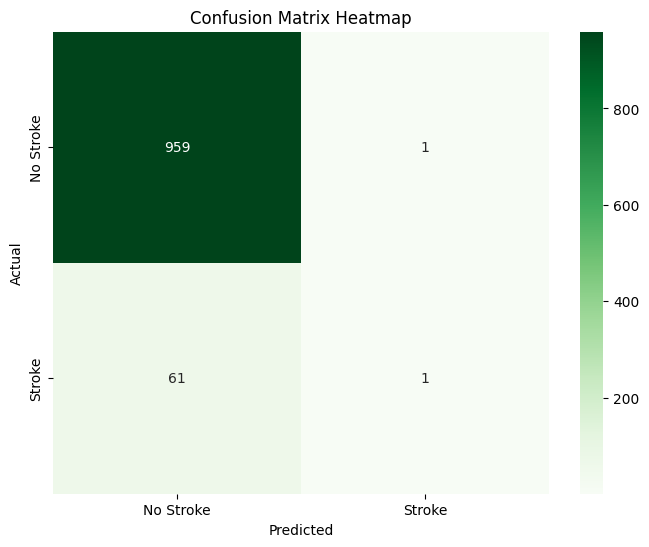

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Observations

The confusion matrix shows the following:

- True Positives (TP): 1 (Predicted 1, Actual 1)
- True Negatives (TN): 959 (Predicted 0, Actual 0)
- False Positives (FP): 1 (Predicted 1, Actual 0)
- False Negatives (FN): 61 (Predicted 0, Actual 1)


**High True Negatives (959)**: The model correctly predicts class 0 (negative class) in most cases.
**Low True Positives (1)**: The model is poorly detecting the positive class (class 1), with only 1 correct prediction for class 1.
**High False Negatives (61)**: The model misses 61 positive instances, predicting them as class 0.
**Very low False Positives (1)**: The model rarely mistakes class 0 instances as class 1.

## **Conclusion**

The Logistic Regression model achieved an accuracy of 94%, but struggled to predict stroke cases (the minority class) due to severe class imbalance. The precision for stroke cases was 50%, while the recall was very low at 1.6%, indicating that the model was biased toward predicting non-stroke cases (majority class) and failed to effectively identify most stroke cases.

**Dataset Bias**: The dataset is highly imbalanced, with a significantly larger proportion of non-stroke cases compared to stroke cases. This imbalance creates a bias in the model's predictions, as it tends to favor the majority class to achieve higher accuracy.


### To Tackle Dataset Bias:

- **Use Class Weights**:
    Assign higher weights to the minority class during model training to make the model pay more attention to it.

- **Collect More Data**:
    Gather additional data, particularly for the minority class, to reduce the imbalance naturally.

- **Resampling Techniques**:
    Oversampling the Minority Class: Use techniques like SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic data points for the minority class (stroke cases).
    Undersampling the Majority Class: Reduce the number of samples from the majority class to balance the dataset.

- **Advanced Algorithms**:
    Try algorithms specifically designed to handle imbalanced datasets, such as Balanced Random Forest.

- **Evaluation Metrics**:
    Focus on metrics like Precision-Recall AUC, F1-score, and Recall instead of overall accuracy, as they provide a better understanding of performance on imbalanced datasets.

In [909]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 90.80%

Confusion Matrix:
[[915  45]
 [ 49  13]]

Precision: 0.22
Recall: 0.21
F1-Score: 0.22
